# Member Task 1:

In [229]:
import os
import math
# Science libraries
import pandas as pd
import numpy as np
# Ploting
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import plotly.graph_objs as go
# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error 
import statsmodels.formula.api as smf

In [230]:
# Create folder to hold the graphs
if not os.path.exists("images"):
    os.mkdir("images")

In [231]:
#read super Covid-19 dataframe with state as index. 
Read = pd.read_csv("../../../data/output/covid.csv")
df = Read.drop(["countyFIPS","stateFIPS","Unnamed: 0"], axis=1)
df = df.drop(df.loc[df['County Name'] == "Statewide Unallocated"].index)

#groups the column by States, and adds up cases of each county per state.
States = df.groupby(['State']).sum()

array = ['TX','CA','FL','NY','PA','NC']
MyStates = States.loc[States.index.isin(array)]

State_cases = MyStates.filter(regex = "x").T.rename_axis('Date')
State_deaths = MyStates.filter(regex = "y").T.rename_axis('Date')

#Calculates differences of cases and deaths of each day (New Cases & New Deaths)
New_State_Cases = State_cases.diff()
New_State_Deaths = State_deaths.diff()

#change date format for cases
MyStateCases  = New_State_Cases .T.rename(columns=lambda x: (pd.to_datetime(x.split('_')[0], errors= 'ignore')), errors='raise').T

#change date format for deaths
MyStateDeaths  = New_State_Deaths.T.rename(columns=lambda x: (pd.to_datetime(x.split('_')[0], errors= 'ignore')), errors='raise').T


MyStateCases = MyStateCases.fillna(0).reset_index()
MyStateDeaths = MyStateDeaths.fillna(0).reset_index()

print(MyStateCases.tail())
print(MyStateDeaths.tail())

State       Date       CA      FL      NC      NY      PA       TX
293   2020-11-10   8603.0  4354.0  3119.0  3965.0  4361.0  11036.0
294   2020-11-11   5391.0  5803.0  2586.0  4820.0  4711.0  11115.0
295   2020-11-12  10507.0  5612.0   781.0  4797.0  5488.0   8804.0
296   2020-11-13   9815.0  6934.0  3892.0  5401.0  5530.0  11302.0
297   2020-11-14   7766.0  4524.0  3118.0  5388.0  5552.0   9415.0
State       Date    CA    FL    NC    NY    PA     TX
293   2020-11-10  66.0  69.0  24.0  36.0  62.0   98.0
294   2020-11-11  37.0  52.0  58.0  32.0  59.0  141.0
295   2020-11-12  33.0  70.0   0.0  27.0  48.0  143.0
296   2020-11-13  80.0  71.0  23.0  25.0  31.0  173.0
297   2020-11-14  33.0  48.0   0.0  28.0  50.0  148.0


In [232]:
TexasCases = MyStateCases.TX[43:].reset_index()
del TexasCases['index']


TexasDeaths = MyStateDeaths.TX[11:].reset_index()
del TexasDeaths['index']


In [233]:
TexasCases 

,TX
0,3.0
1,1.0
2,4.0
3,3.0
4,5.0
...,...
250,11036.0
251,11115.0
252,8804.0
253,11302.0


# Linear Regression model of the State of Texas New Cases and Deaths. 

In [243]:
# create X and y
X = TexasCases.index.values.reshape(-1, 1)
y = TexasCases

### Linear Regression of New Cases

[296.48581495]
[[29.33497351]]


Text(0, 0.5, 'Cases')

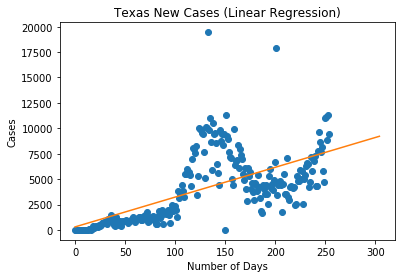

In [245]:
# follow the usual sklearn pattern: import, instantiate, fit
model = LinearRegression()
model.fit(X, y)

# print intercept and coefficients
print (model.intercept_)
print (model.coef_)

# Plot the data and the model prediction
X_fit = np.linspace(X.min(), X.max()+50, 1000)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit)
plt.title('Texas New Cases (Linear Regression)')
plt.xlabel('Number of Days')
plt.ylabel('Cases')


#### RMSE

In [186]:
from sklearn.metrics import mean_squared_error 
import math
mse = mean_squared_error(X_fit, y_fit)

rmse = math.sqrt(mse)
print(rmse)

4529.950706924409


### NonLinear Regression of New Cases

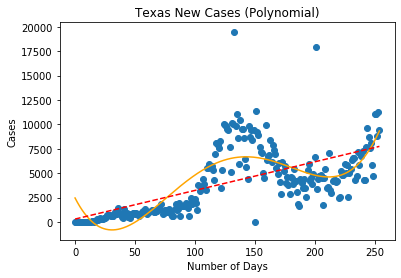

In [187]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
plt.scatter(X, y)
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='orange')
plt.title('Texas New Cases (Polynomial)')
plt.xlabel('Number of Days')
plt.ylabel('Cases')

x = TexasCases.index
y = TexasCases["TX"] 
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

#### RMSE

In [188]:
mse = mean_squared_error(X_fit, y_fit)

rmse = math.sqrt(mse)
print(rmse)

4529.950706924409


### Linear Regression of New Deaths

In [250]:
# create X and y
X = TexasDeaths.index.values.reshape(-1, 1)
y = TexasDeaths

[-8.71239837]
[[0.53498839]]


Text(0, 0.5, 'Cases')

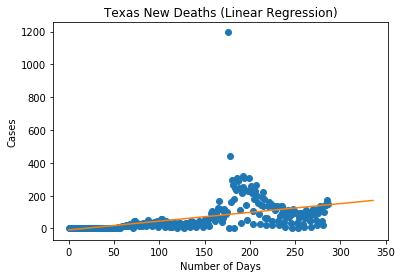

In [251]:
# follow the usual sklearn pattern: import, instantiate, fit
model = LinearRegression()
model.fit(X, y)

# print intercept and coefficients
print (model.intercept_)
print (model.coef_)

# Plot the data and the model prediction
X_fit = np.linspace(X.min(), X.max()+50, 1000)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);
plt.title('Texas New Deaths (Linear Regression)')
plt.xlabel('Number of Days')
plt.ylabel('Cases')

#### RMSE

In [191]:
mse = mean_squared_error(X_fit, y_fit)

rmse = math.sqrt(mse)
print(rmse)

86.33613994394332


### NonLinear Regression of New Deaths

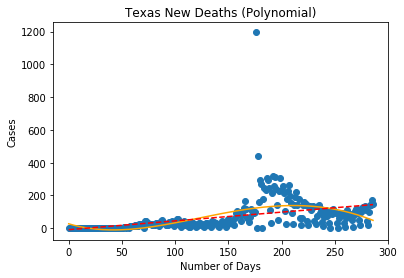

In [240]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
plt.scatter(X, y)
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='orange')
plt.title('Texas New Deaths (Polynomial)')
plt.xlabel('Number of Days')
plt.ylabel('Cases')

x = TexasDeaths.index
y = TexasDeaths["TX"] 
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

#### RMSE

In [193]:
mse = mean_squared_error(X_fit, y_fit)

rmse = math.sqrt(mse)
print(rmse)

86.33613994394332


# Top 5 Texas Counties Linear Regression

In [194]:
#read texas county data from stage II
TX_county_Cases = pd.read_csv("../../Stage_II/Badesha/Data/TX_County_cases.csv")
TX_county_Deaths = pd.read_csv("../../Stage_II/Badesha/Data/TX_County_deaths.csv")

#fill na values with 0
TX_county_Cases = TX_county_Cases.fillna(0)
TX_county_Deaths = TX_county_Deaths.fillna(0)

#start dataset to first day of infection 
TX_county_Cases = TX_county_Cases[43:].reset_index()
del TX_county_Cases['index']

TX_county_Cases 

,Date,Bexar County,Dallas County,Harris County,Hidalgo County,Tarrant County
0,2020-03-05,0.0,0.0,2.0,0.0,0.0
1,2020-03-06,0.0,0.0,1.0,0.0,0.0
2,2020-03-07,0.0,0.0,2.0,0.0,0.0
3,2020-03-08,0.0,0.0,0.0,0.0,0.0
4,2020-03-09,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
249,2020-11-09,417.0,807.0,786.0,0.0,351.0
250,2020-11-10,332.0,1095.0,625.0,198.0,1415.0
251,2020-11-11,0.0,1267.0,790.0,147.0,850.0
252,2020-11-12,337.0,926.0,2089.0,183.0,684.0


## Bexar County 

75.27985178323289
[1.56493472]


Text(0, 0.5, 'Cases')

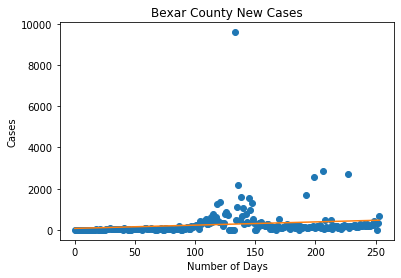

In [195]:
# create X and y
X = TX_county_Cases.index.values.reshape(-1, 1)
y = TX_county_Cases['Bexar County']

# follow the usual sklearn pattern: import, instantiate, fit
model = LinearRegression()
model.fit(X, y)

# print intercept and coefficients
print (model.intercept_)
print (model.coef_)

# Plot the data and the model prediction
X_fit = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);
plt.title('Bexar County New Cases')
plt.xlabel('Number of Days')
plt.ylabel('Cases')

## Dallas County 

100.39546086150983
[2.49875674]


Text(0, 0.5, 'Cases')

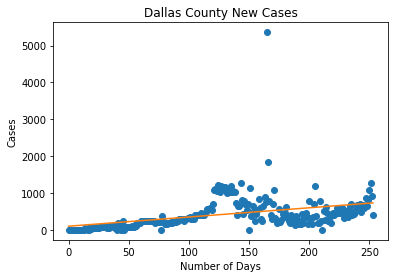

In [196]:
# create X and y
X = TX_county_Cases.index.values.reshape(-1, 1)
y = TX_county_Cases['Dallas County']

# follow the usual sklearn pattern: import, instantiate, fit
model = LinearRegression()
model.fit(X, y)

# print intercept and coefficients
print (model.intercept_)
print (model.coef_)

# Plot the data and the model prediction
X_fit = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);
plt.title('Dallas County New Cases')
plt.xlabel('Number of Days')
plt.ylabel('Cases')

## Harris County 

120.52922649374693
[4.3976713]


Text(0, 0.5, 'Cases')

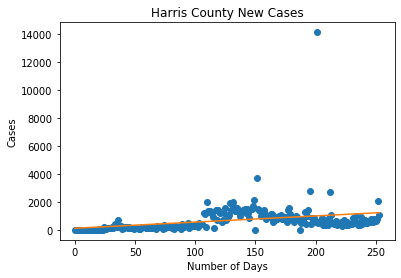

In [197]:
# create X and y
X = TX_county_Cases.index.values.reshape(-1, 1)
y = TX_county_Cases['Harris County']

# follow the usual sklearn pattern: import, instantiate, fit
model = LinearRegression()
model.fit(X, y)

# print intercept and coefficients
print (model.intercept_)
print (model.coef_)

# Plot the data and the model prediction
X_fit = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);
plt.title('Harris County New Cases')
plt.xlabel('Number of Days')
plt.ylabel('Cases')

## Hidalgo County 

28.52274201018983
[0.93271991]


Text(0, 0.5, 'Cases')

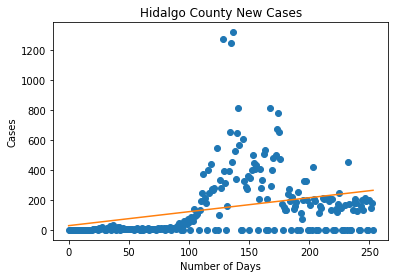

In [198]:
# create X and y
X = TX_county_Cases.index.values.reshape(-1, 1)
y = TX_county_Cases['Hidalgo County']

# follow the usual sklearn pattern: import, instantiate, fit
model = LinearRegression()
model.fit(X, y)

# print intercept and coefficients
print (model.intercept_)
print (model.coef_)

# Plot the data and the model prediction
X_fit = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);
plt.title('Hidalgo County New Cases')
plt.xlabel('Number of Days')
plt.ylabel('Cases')

## Tarrant County 

-8.120333487725873
[2.2306671]


Text(0, 0.5, 'Cases')

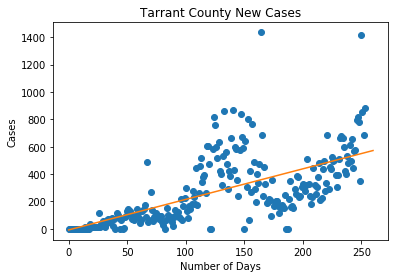

In [199]:
# create X and y
X = TX_county_Cases.index.values.reshape(-1, 1)
y = TX_county_Cases['Tarrant County']

# follow the usual sklearn pattern: import, instantiate, fit
model = LinearRegression()
model.fit(X, y)

# print intercept and coefficients
print (model.intercept_)
print (model.coef_)

# Plot the data and the model prediction
X_fit = np.linspace(X.min(), X.max()+7, 1000)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);
plt.title('Tarrant County New Cases')
plt.xlabel('Number of Days')
plt.ylabel('Cases')

# Analysis:
### It looks like Tarrant county linear regression is increasing more than the other counties.
### Tarrant County looks to be more at risk for more COVID Cases

# Utilize Hospital Data to calculate point of no return:

In [200]:
df = pd.read_csv("../../../data/output/COVID19_HOSBEDS_MERGE.csv")
df = df.drop(["countyFIPS","stateFIPS","Unnamed: 0"], axis=1)
Hospital = df.drop(df.loc[df['County Name'] == "Statewide Unallocated"].index)

#groups the column by States, and adds up cases of each county per state.
HospitalStates = Hospital.groupby(['State']).sum()

MyVar = HospitalStates[['10/21/20_y','NUM_ICU_BEDS']]
Hospital_deaths = MyVar.rename(columns ={"10/21/20_y" : "Deaths"})

Hospital_deaths['Percentage'] = (Hospital_deaths['Deaths']/Hospital_deaths['NUM_ICU_BEDS'])
Hospital_deaths[22:]

,Deaths,NUM_ICU_BEDS,Percentage
State,,,
MI,7336,2602.0,2.819370
MN,2246,1523.0,1.474721
MO,2657,2170.0,1.224424
MS,3231,1069.0,3.022451
MT,275,335.0,0.820896
NC,3992,2648.0,1.507553
ND,422,516.0,0.817829
NE,573,782.0,0.732737
NH,469,278.0,1.687050


# Analysis:
## It looks like New Jersey had the large number of deaths compared to ICU Beds. 
## It seems that Wisconsin is closing in to the "point of no return" as its total deaths are nearing to the maximum number of ICU Beds. 

# Utilize decision tree, Random Forest, and Arima

In [201]:
# create X and y
X = TexasCases.index.values.reshape(-1, 1)
y = TexasCases

## Random Forest

C:\Users\harin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\harin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


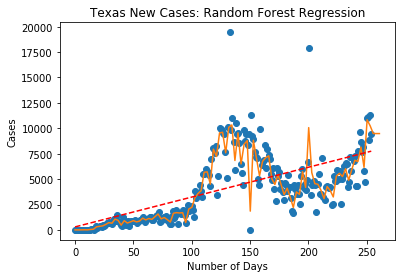

In [202]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(X.min(), X.max()+7, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);
plt.title('Texas New Cases: Random Forest Regression')
plt.xlabel('Number of Days')
plt.ylabel('Cases')

x = TexasCases.index
y = TexasCases["TX"] 
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

In [203]:
mse = mean_squared_error(X_fit, y_fit)

rmse = math.sqrt(mse)
print(rmse)

5055.508747066277


# ARIMA 

In [204]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

                             ARIMA Model Results                              
Dep. Variable:                   D.TX   No. Observations:                  254
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2262.512
Method:                       css-mle   S.D. of innovations           1783.940
Date:                Sun, 15 Nov 2020   AIC                           4539.025
Time:                        20:34:42   BIC                           4563.786
Sample:                             1   HQIC                          4548.986
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.8343     34.295      1.132      0.259     -28.383     106.052
ar.L1.D.TX    -0.6796      0.060    -11.284      0.000      -0.798      -0.562
ar.L2.D.TX    -0.5103      0.070     -7.271      0.0

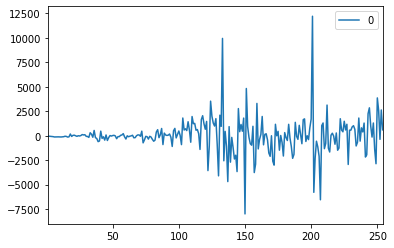

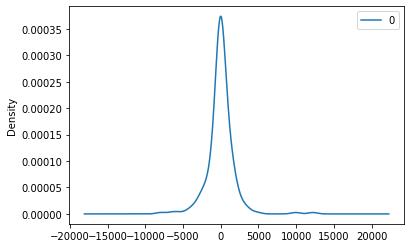

                  0
count    254.000000
mean      -0.648305
std     1787.465233
min    -7987.829562
25%     -454.644987
50%      -27.022237
75%      569.715974
max    12193.931020


In [205]:

series = TexasCases.squeeze()
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

## Decision Tree

In [206]:
from sklearn.tree import DecisionTreeRegressor

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

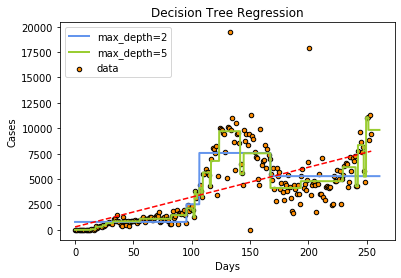

In [207]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, X.max()+7, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Days")
plt.ylabel("Cases")
plt.title("Decision Tree Regression")
plt.legend()
x = TexasCases.index
y = TexasCases["TX"] 
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

In [208]:
mse = mean_squared_error(X_test, y_1)

rmse = math.sqrt(mse)
print(rmse)

4754.596944055297


# Analysis:
### The three graphs show different variations of prediction of COVID-19 Cases.

# Predict Spread rate(cases and death) of COVID-19 in a county using enrichment variables. 

In [209]:
HospitalVar = Hospital[['County Name','10/21/20_y','NUM_ICU_BEDS','AVG_VENTILATOR_USAGE','BED_UTILIZATION','NUM_STAFFED_BEDS','Potential_Increase_In_Bed_Capac']]
HospitalVar  = HospitalVar.rename(columns ={"10/21/20_y" : "Deaths"})

HospitalVar = HospitalVar.fillna(0)

HospitalVar

,County Name,Deaths,NUM_ICU_BEDS,AVG_VENTILATOR_USAGE,BED_UTILIZATION,NUM_STAFFED_BEDS,Potential_Increase_In_Bed_Capac
1,Autauga County,30,6.0,2.0,0.623113,55.0,30.0
2,Baldwin County,69,51.0,8.0,2.248812,362.0,24.0
3,Barbour County,9,5.0,2.0,0.378721,30.0,44.0
4,Bibb County,14,4.0,1.0,0.430904,25.0,10.0
5,Blount County,25,6.0,2.0,0.499069,25.0,0.0
...,...,...,...,...,...,...,...
3190,Sweetwater County,2,13.0,2.0,0.216816,74.0,41.0
3191,Teton County,1,6.0,2.0,0.359132,48.0,0.0
3192,Uinta County,2,6.0,2.0,0.826807,105.0,120.0
3193,Washakie County,7,3.0,2.0,0.287976,18.0,0.0


# Number of ICU Beds compared to Deaths
### (Random Forest and Decision Tree)

In [210]:
# create X and y
X = HospitalVar.NUM_ICU_BEDS.values.reshape(-1, 1)
y = HospitalVar['Deaths']

C:\Users\harin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


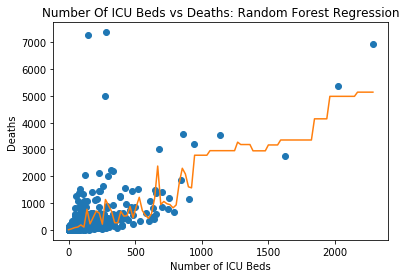

C:\Users\harin\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


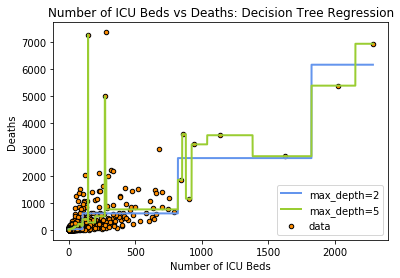

1675.417347164316
2068.7358654792893


In [211]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);
plt.title('Number Of ICU Beds vs Deaths: Random Forest Regression')
plt.xlabel('Number of ICU Beds')
plt.ylabel('Deaths')

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, X.max(), 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Number of ICU Beds")
plt.ylabel("Deaths")
plt.title("Number of ICU Beds vs Deaths: Decision Tree Regression")
plt.legend()
plt.show()

mse = mean_squared_error(X_fit, y_fit)

rmse = math.sqrt(mse)
print(rmse)

mse = mean_squared_error(X_test, y_1 )

rmse = math.sqrt(mse)
print(rmse)

# Average Ventilator Usage compared to Deaths
### (Random Forest and Decision Tree)

In [212]:
# create X and y
X = HospitalVar.AVG_VENTILATOR_USAGE.values.reshape(-1, 1)
y = HospitalVar['Deaths']

C:\Users\harin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


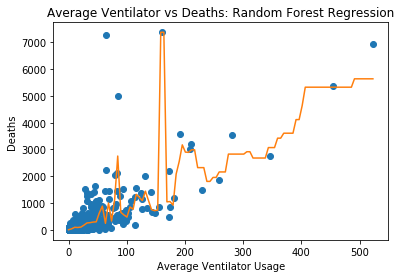

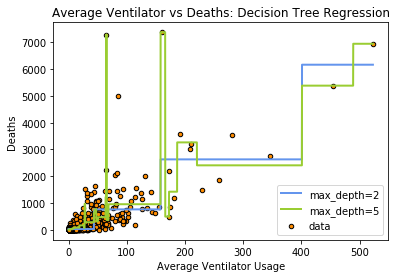

3133.256767299896
3201.7489936839156


In [213]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);
plt.title('Average Ventilator vs Deaths: Random Forest Regression')
plt.xlabel('Average Ventilator Usage')
plt.ylabel('Deaths')

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, X.max(), 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Average Ventilator Usage")
plt.ylabel("Deaths")
plt.title("Average Ventilator vs Deaths: Decision Tree Regression")
plt.legend()
plt.show()

mse = mean_squared_error(X_fit, y_fit)

rmse = math.sqrt(mse)
print(rmse)

mse = mean_squared_error(X_test, y_1 )

rmse = math.sqrt(mse)
print(rmse)

# Number of Staffed Beds compared to Deaths
### (Random Forest and Decision Tree)

In [214]:
# create X and y
X = HospitalVar.NUM_STAFFED_BEDS.values.reshape(-1, 1)
y = HospitalVar['Deaths']

C:\Users\harin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


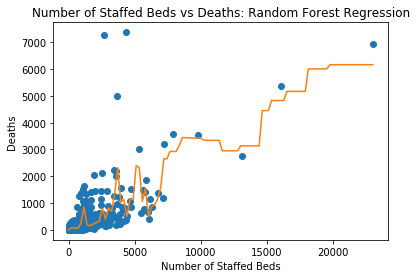

C:\Users\harin\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


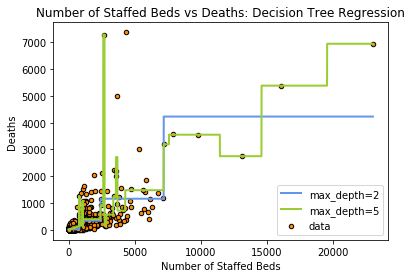

9463.024206114293
9964.556475993262


In [215]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);
plt.title('Number of Staffed Beds vs Deaths: Random Forest Regression')
plt.xlabel('Number of Staffed Beds')
plt.ylabel('Deaths')


# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, X.max(), 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Number of Staffed Beds")
plt.ylabel("Deaths")
plt.title("Number of Staffed Beds vs Deaths: Decision Tree Regression")
plt.legend()
plt.show()

mse = mean_squared_error(X_fit, y_fit)

rmse = math.sqrt(mse)
print(rmse)

mse = mean_squared_error(X_test, y_1 )

rmse = math.sqrt(mse)
print(rmse)

# Bed Utilization compared to Deaths
### (Random Forest and Decision Tree)

In [216]:
# create X and y
X = HospitalVar.BED_UTILIZATION.values.reshape(-1, 1)
y = HospitalVar['Deaths']

C:\Users\harin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


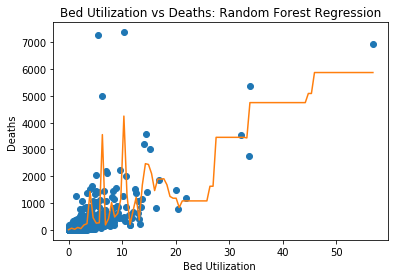

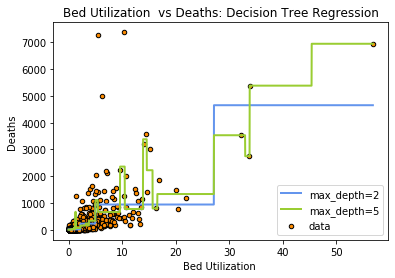

3705.597897523675
3383.2804193198367


In [217]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);
plt.title('Bed Utilization vs Deaths: Random Forest Regression')
plt.xlabel('Bed Utilization ')
plt.ylabel('Deaths')


# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, X.max(), 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Bed Utilization ")
plt.ylabel("Deaths")
plt.title("Bed Utilization  vs Deaths: Decision Tree Regression")
plt.legend()
plt.show()

mse = mean_squared_error(X_fit, y_fit)

rmse = math.sqrt(mse)
print(rmse)

mse = mean_squared_error(X_test, y_1 )

rmse = math.sqrt(mse)
print(rmse)

# Potential increase to bed capacity compared to Deaths
### (Random Forest and Decision Tree)

In [218]:
# create X and y
X = HospitalVar.Potential_Increase_In_Bed_Capac.values.reshape(-1, 1)
y = HospitalVar['Deaths']

C:\Users\harin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


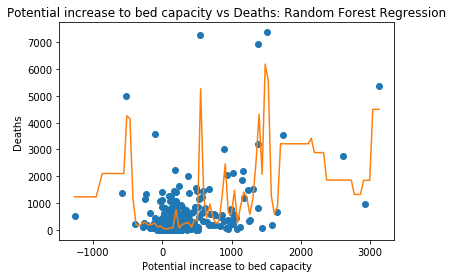

C:\Users\harin\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


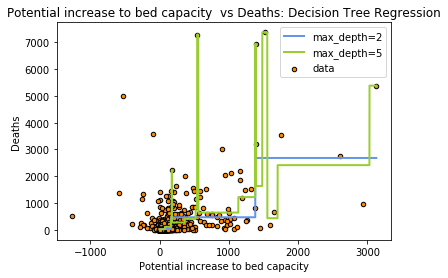

1678.6947414949743
612.4651687070003


In [219]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);
plt.title('Potential increase to bed capacity vs Deaths: Random Forest Regression')
plt.xlabel('Potential increase to bed capacity')
plt.ylabel('Deaths')


# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, X.max(), 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Potential increase to bed capacity")
plt.ylabel("Deaths")
plt.title("Potential increase to bed capacity  vs Deaths: Decision Tree Regression")
plt.legend()
plt.show()

mse = mean_squared_error(X_fit, y_fit)

rmse = math.sqrt(mse)
print(rmse)

mse = mean_squared_error(X_test, y_1 )

rmse = math.sqrt(mse)
print(rmse)

# Anaylsis:
### We can see that a lot of the enrichment variable have a similar trend in random forest regression plot. 
### Forest Regression RMSE seems to be greater in bed capacity and bed utilization but its RMSE is lesser in number of staffed beds, ventilator usage and ICU beds
### ICU beds and Staffed Beds are relatively important variables because their trend has a very positive slope which predicts that the more beds that are staffed, the more deaths are occuring

# Task 2: Confidence Interval, Trend Line, Path

In [220]:
TexasCases = TexasCases.reset_index()
MyTexasCases = TexasCases.rename(columns={"index":"Days","TX":'Cases'})

In [221]:
MyTexasCases

,Days,Cases
0,0,3.0
1,1,1.0
2,2,4.0
3,3,3.0
4,4,5.0
...,...,...
250,250,11036.0
251,251,11115.0
252,252,8804.0
253,253,11302.0


## Replot linear regression for Texas New cases using StatModels for Trend Line and Prediction path

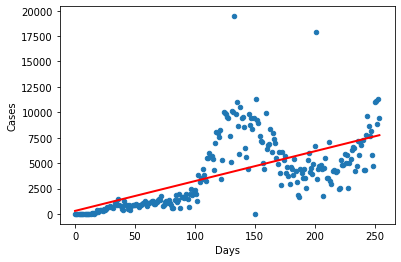

In [222]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Cases ~ Days', data=MyTexasCases).fit()

X_new = pd.DataFrame({'Days': [MyTexasCases.Days.min(),MyTexasCases.Days.max()]})

preds = lm.predict(X_new)

MyTexasCases.plot(kind='scatter', x = 'Days', y = 'Cases')
plt.plot(X_new, preds, c='red', linewidth=2)

# Confidence Interval for Linear Texas New Cases 

In [223]:
lm.conf_int()

,0,1
Intercept,-349.465444,942.437074
Days,24.934498,33.735449


## Replot linear regression for Texas New deaths using StatModels for trend line and prediction path

In [224]:
TexasDeaths = TexasDeaths.reset_index()
MyTexasDeaths = TexasDeaths.rename(columns={"index":"Days","TX":'Deaths'})

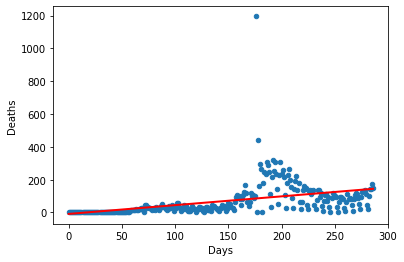

In [225]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Deaths ~ Days', data=MyTexasDeaths ).fit()

X_new = pd.DataFrame({'Days': [MyTexasDeaths.Days.min(),MyTexasDeaths.Days.max()]})

preds = lm.predict(X_new)

MyTexasDeaths .plot(kind='scatter', x = 'Days', y = 'Deaths')
plt.plot(X_new, preds, c='red', linewidth=2)

# confidence Interval for Texas New Death

In [226]:
lm.conf_int()

,0,1
Intercept,-29.805119,12.380323
Days,0.407360,0.662617
